In [200]:
import numpy as np
import pandas as pd

### Loading movies review corpus data, to convert into embedding feture vector using Word2Vec model pulled from gensim to play with pandas df or pyspark df, Ofcourse Pyspark.ml.feature has it too

In [201]:
df1 = pd.read_csv('Movie_reviews.csv', sep=',', encoding='utf-8', encoding_errors='ignore')
df2 = pd.DataFrame(df1['Review'])
df2

,Review
0,The Da Vinci Code book is just awesome.
1,this was the first clive cussler i've ever rea...
2,i liked the Da Vinci Code a lot.
3,i liked the Da Vinci Code a lot.
4,I liked the Da Vinci Code but it ultimatly did...
...,...
7082,So Brokeback Mountain was really depressing.
7083,"As I sit here, watching the MTV Movie Awards, ..."
7084,Ok brokeback mountain is such a horrible movie.
7085,"Oh, and Brokeback Mountain was a terrible movie."


### Tokenizing corpus, no need to remove stop words from tokenized_corpus, since we are dealing with Word2vec model, which is prediction based model unlike other frequency based model such as BaselineBOG, countVector, TFIDF

In [202]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import gensim
import gensim.downloader as api
from gensim.models import word2vec 
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import  accuracy_score

In [204]:
#df = pd.read_csv('bbc_data.csv')
    
# train test split
X = df2['Review'].apply(gensim.utils.simple_preprocess)

In [205]:
X.head(5)#,type(X)

0      [the, da, vinci, code, book, is, just, awesome]
1    [this, was, the, first, clive, cussler, ve, ev...
2                   [liked, the, da, vinci, code, lot]
3                   [liked, the, da, vinci, code, lot]
4    [liked, the, da, vinci, code, but, it, ultimat...
Name: Review, dtype: object

In [206]:
# train test split
X_train, X_test = train_test_split(X, test_size=0.25, random_state=2024)         
print(X_train.shape,X_test.shape)

(5315,) (1772,)


In [207]:
w2v_model1 = Word2Vec(X_train, window=3,  vector_size=100, min_count=155, epochs=30)

In [208]:
type(X_train)

w2v_model2 = Word2Vec(X_train, min_count = 150,vector_size= 100, window = 5, sg=0, epochs=5) 

In [209]:
words = set(w2v_model2.wv.index_to_key) # Vocab/dictionary : unique collection of words
len(words)


47

### This part is mainly to remove stop words from Words/dictionary/vocabulary of word2vec model, to later filter out some of unnecessarily showing words in Vocabulary Vector 2d/3d graphs

In [210]:
import nltk
from nltk.corpus import stopwords
 
#nltk.download('stopwords')
#print(stopwords.words('english'))

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = """This is a sample sentence,
				showing off the stop words filtration."""

stop_words = set(stopwords.words('english'))

####word_tokens = word_tokenize(example_sent)
word_tokens = words
# converts the words in word_tokens to lower case and then checks whether 
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []

for w in word_tokens:
	if w not in stop_words:
		filtered_sentence.append(w)

#print(word_tokens)
print(filtered_sentence)


['really', 'loved', 'much', 'like', 'potter', 'love', 'sucked', 'da', 'awesome', 'harry', 'hate', 'one', 'impossible', 'code', 'movie', 'mission', 'suck', 'sucks', 'mountain', 'movies', 'vinci', 'brokeback', 'want', 'know']


In [211]:
#w2v_model2.wv['harry'] 

w2v_model2.wv

In [212]:
print(w2v_model2.wv['brokeback'] )

[ 1.21691488e-02  5.19415401e-02  4.62307921e-03  6.90705776e-02
 -4.24377397e-02 -1.43353134e-01  1.77376494e-01  2.19567597e-01
 -8.68138522e-02 -2.19648108e-01  9.20398235e-02 -1.61004037e-01
  6.27569258e-02  9.24881771e-02 -1.53753283e-02 -6.97798058e-02
  2.44457498e-01 -2.73149572e-02  9.50006302e-03 -3.87234837e-01
  5.61727434e-02  8.30730125e-02  2.27845088e-01 -1.46810815e-01
 -3.02209444e-02  4.02441733e-02 -2.04025179e-01  1.20809511e-03
 -8.10296983e-02  4.29461338e-02  1.91445142e-01 -7.37542212e-02
  1.42375410e-01 -2.27686360e-01 -1.51947081e-01  1.74864322e-01
 -2.28374987e-03 -2.08418705e-02 -1.43568218e-01 -1.53687641e-01
  7.45177642e-02 -1.12844817e-01 -4.61071730e-03 -4.22663242e-03
  1.06747083e-01 -1.40035927e-01 -1.29372805e-01 -1.61297783e-01
  1.05264977e-01  7.25197047e-02 -1.71507075e-02 -1.43901691e-01
 -5.41612394e-02  1.06958288e-03 -5.95198199e-02 -1.11792320e-02
  1.02460146e-01 -7.53219798e-02 -4.18814532e-02 -2.89796069e-02
 -1.05541563e-02 -1.94574

In [213]:
list1 = []
for i in filtered_sentence:
    temp1 = w2v_model2.wv[i]
    list1.append(temp1)

In [214]:
n_temp = np.array(list1)

In [215]:
n_temp.shape

(24, 100)

### Function of Document vectorization : using Word2vec Model_Vocab/dictionary_vectors
### Additionaly, applied same function on X_train_corpus and X_test_corpus
### and also achieved embeddings of vector sized for each doc as a result

In [216]:
# function to vectorize data
def sentence_vectorizer(corpus,model):
    result = []
    for sentence in corpus:
        counter = 0
        bucket = np.zeros(model.vector_size)
        for word in sentence:
            if word in model.wv:
                counter = counter + 1
                bucket = bucket+ model.wv[word]
            else:
                pass
        if counter != 0 :
            bucket = bucket / counter
        else : 
            counter = 1
            bucket = bucket / counter
        
        result.append(bucket) 
    return result

# vectorize
words = set(w2v_model1.wv.index_to_key) # Vocab/dictionary : unique collection of words
X_train_vec1 = sentence_vectorizer(X_train,w2v_model1)
X_test_vec1 = sentence_vectorizer(X_test,w2v_model1)

# ml model since we dont have label this block won't be of any help
# rf = RandomForestClassifier()
# rf.fit(X_train_vec, y_train)


In [217]:
len(X_train_vec1)
#X_train_vec
np.asarray(X_train_vec1).shape, len(words)

((5315, 100), 44)

In [218]:
n2_temp = np.asarray(X_train_vec1)
X_train_vec_df = pd.DataFrame (n2_temp)
X_train_vec_df.head(5)           #Showing Embeddings of X_train_corpus or X_train_all_documents and dimnension would be (doc,vector_size) i.e. (5k,100)
                                #which can be used later for model training/ML task or with Vector Assembler in pyspark type df to convert into features_col_final


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.399119,0.158941,0.359732,0.228068,0.159714,-0.207584,0.134004,0.543855,0.025050,-0.325107,...,0.170484,-0.273140,0.095198,-0.318184,0.163453,0.122348,0.247683,-0.236005,-0.194914,0.282765
1,-0.336276,0.166866,0.342014,0.262606,0.164136,-0.224717,0.096579,0.560788,0.027813,-0.337145,...,0.184495,-0.326959,0.055465,-0.336929,0.214748,0.129013,0.143196,-0.229438,-0.223116,0.329272
2,-0.420846,0.223901,0.393886,0.224797,0.218427,-0.212202,0.068077,0.562208,0.083192,-0.379857,...,0.202763,-0.359303,0.003417,-0.386649,0.212469,0.105330,0.176683,-0.254679,-0.274844,0.322174
3,-0.289083,0.108173,0.360716,0.285431,0.112576,-0.234193,0.140126,0.515919,0.063611,-0.346667,...,0.188285,-0.211973,0.068379,-0.213855,0.148488,0.149818,0.147163,-0.230690,-0.248875,0.263275
4,-0.112917,-0.079539,-0.441825,-0.305480,-0.050707,-0.008546,0.021532,0.330980,-0.406877,-0.174533,...,-0.059573,0.336654,0.254896,0.076174,0.471847,0.078860,-0.103664,-0.016158,0.224087,-0.314572


In [219]:
X_train_vec_df.isna()
X_train_vec_df.isnull().values.any()

False

### 2d Scatterplot of word2vec model dictionary/vocabularies vectorsized vector mapping to 2d- 2-components pca analysis

### Recent Learning : Word2Vec Vectorization of Dictionary/Vocab is Completely unnecessary. I think this should mean Dictinary to Dictinary(100x100) representation in latent way. Additionally, PCA transformation of Dictionary from 47x100 to 47x2 just means same Dictionary is now 2 dimensional which can be plotted as well, and generally visualized in 2d or 3d(pca 3 component). However Only Upside of Ploting could be said that, sometime You could see how relevant dictionary word2vec model has created by quick visualization of it in 2d/3d space.

In [220]:
X_train_vec = n_temp.tolist()
words = filtered_sentence

In [221]:
# run PCA with 2 compopnent to visualize page category embedding
pca = PCA(n_components=2)
result = pca.fit_transform(X_train_vec)

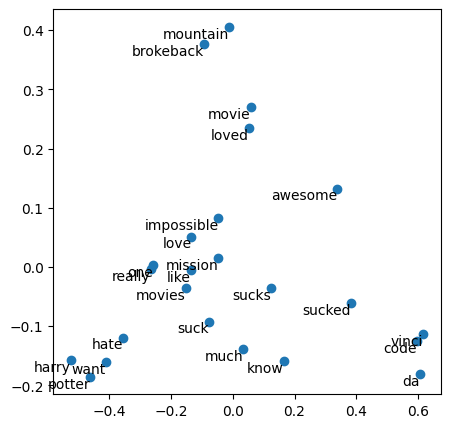

In [222]:
# plotting with page-categories
# create a scatter plot of the projection
plt.figure(figsize=(5,5))
plt.scatter(result[:, 0], result[:, 1])

for i,page_category in enumerate(words):
    plt.annotate(page_category,horizontalalignment='right', verticalalignment='top',xy=(result[i, 0], result[i, 1]))

plt.show()

In [223]:
#We can save our existing models and load them again
w2v_model2.save("word2vec.model")


### 3d plot of word2vec model dictionary/vocabularies vectorsized vector mapping to 3d 3-components pca analysis

In [224]:
X_train_vec = n_temp.tolist()
words = filtered_sentence

In [225]:
# run PCA with 2 compopnent to visualize page category embedding
pca = PCA(n_components=3)
result = pca.fit_transform(X_train_vec)


In [226]:
result_df = pd.DataFrame(result)
x= result_df.iloc[:,0].to_numpy()
y= result_df.iloc[:,1].to_numpy()
z= result_df.iloc[:,2].to_numpy()

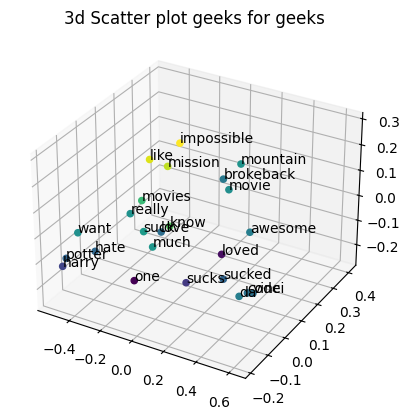

In [227]:
# importing mplot3d toolkits
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt



# plotting with page-categories
# create a scatter plot of the projection
plt.figure()#figsize=(10,10,10))
ax = plt.axes(projection ='3d')
#plt.scatter(result[:, 0], result[:, 1])

# for i,page_category in enumerate(words):
#     plt.annotate(page_category,horizontalalignment='right', verticalalignment='top',xy=(result[i, 0], result[i, 1]))

# plt.show()

# defining all 3 axis
z
x
y

ax.scatter(x, y, z, c=z, alpha=1)

for x, y, z, label in zip(x, y, z, filtered_sentence):
    ax.text(x, y, z, label)

# syntax for plotting
ax.set_title('3d Scatter plot geeks for geeks')
plt.show()

### Testing whathappens if unknown token appeared in document while using pretrained word2vec model

In [228]:
df4 = X_test.head()
l1 = ['shahrukhkhan']
l2 = ['great', 'movie','of', 'salman']
df4.iloc[2] = l1
df4.iloc[3] = l2
df5 = df4

In [229]:
df5

4954    [friday, hung, out, with, kelsie, and, we, wen...
3285                          [love, brokeback, mountain]
3433                                       [shahrukhkhan]
7079                           [great, movie, of, salman]
4786                         [da, vinci, code, sucks, be]
Name: Review, dtype: object

In [230]:
df5_vec1 = sentence_vectorizer(df5,w2v_model1)

In [231]:
n3_temp = np.asarray(df5_vec1)
df5_vec1_vec_df = pd.DataFrame (n3_temp)
df5_vec1_vec_df.head(5)           #Showing Embeddings of X_train_corpus or X_train_all_documents and dimnension would be (doc,vector_size) i.e. (5k,100)
                                #which can be used later for model training/ML task or with Vector Assembler in pyspark type df to convert into features_col_final


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.437499,0.104781,0.090866,0.146044,0.192970,-0.173747,0.109635,0.477716,0.007434,-0.198393,...,0.121593,-0.221988,0.201425,-0.299707,0.145762,0.008173,0.255272,-0.096319,-0.104559,0.262503
1,0.465822,-0.016118,0.062622,0.229457,-0.132503,-0.053649,0.419088,0.149471,-0.189074,-0.310397,...,-0.034712,0.025156,-0.232582,0.184227,0.236372,-0.043449,-0.020389,-0.143340,0.213805,0.054710
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.421011,0.062277,0.289744,0.230405,0.143519,-0.095188,0.497248,0.950993,-0.420172,-0.165773,...,-0.143061,-0.030120,0.353847,0.064975,0.770944,0.016838,-0.005240,0.022564,0.351968,0.113165
4,-0.797267,0.391057,0.281105,0.252967,0.224226,-0.099008,0.146112,0.576362,-0.170465,-0.305860,...,0.060098,-0.337542,0.122671,-0.488787,0.252205,0.028998,0.314349,-0.255063,-0.198379,0.178692


In [232]:
df5_vec1_vec_df.isna()
df5_vec1_vec_df.isnull().values.any()

False